In [84]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [76]:
import random

In [11]:
def adj():
    return random.choice('蓝色的 | 好看的 | 小小的'.split(' | '))

In [11]:
adj()

'小小的'

In [12]:
def adj_star():
    return random.choice([lambda : '' , lambda : adj() + adj_star() ])()

In [13]:
adj_star()

'蓝色的好看的'

## 更换语法怎么解决

In [88]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [89]:
def create_grammar(grammar_str , split = "=>" , line_split = "\n"):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip():
            continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [90]:
grammar = create_grammar(adj_grammar)

In [91]:
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [92]:
grammar

{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [93]:
choice = random.choice

def generate(gram,target):
    if target not in gram:
        return target
    expaned = [generate(gram,t) for t in choice(gram[target])]
    return ''.join([e if e!='/n' else '\n' for e in expaned if e!='null'])

In [94]:
example_grammar = create_grammar(simple_grammar)

In [95]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [96]:
example_grammar['sentence']

[['noun_phrase', 'verb_phrase']]

In [97]:
example_grammar['noun_phrase']

[['Article', 'Adj*', 'noun']]

In [98]:
generate(gram=example_grammar, target='sentence')

'这个篮球看见一个小猫'

In [63]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [64]:
for i in range(20):
    print(generate(gram=create_grammar(human,split='='),target='human'))

我找找乐子
我找找乐子
俺想找点乐子
我们找找玩的
我们想找点玩的
俺找找乐子
俺想找点玩的
俺找找乐子
我们想找点乐子
俺找找乐子
我想找点玩的
我们找找乐子
我们找找乐子
我找找玩的
俺想找点乐子
我找找玩的
我们找找乐子
我们找找乐子
我找找玩的
俺想找点乐子


In [65]:
for i in range(20):
    print(generate(gram=create_grammar(host,split='='),target='host'))

小朋友,您好我是55号,请问你要喝酒吗？
小朋友,你好我是149号,请问你要赌博吗？
您好我是2号,请问你要赌博吗？
您好我是6号,您需要打牌吗？
您好我是4212号,请问你要赌博吗？
女士,你好我是8号,请问你要打牌吗？
您好我是441号,您需要喝酒吗？
你好我是54号,请问你要赌博吗？
女士,您好我是793号,您需要赌博吗？
小朋友,您好我是11号,请问你要打猎吗？
你好我是7号,请问你要喝酒吗？
女士,您好我是5号,您需要打牌吗？
您好我是1号,请问你要喝酒吗？
您好我是2438195号,您需要打猎吗？
女士,你好我是965号,您需要打猎吗？
你好我是715号,请问你要喝酒吗？
您好我是6号,您需要打猎吗？
小朋友,你好我是66号,您需要喝酒吗？
小朋友,您好我是5号,请问你要打猎吗？
小朋友,你好我是4348号,您需要赌博吗？


## Data Driven

In [13]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [14]:
print(generate(gram=create_grammar(programming),target="stmt"))

while(infostudent2){
....if(namename3){
....course1=course2}}


## Language Model

$$language\_model(String) = Probability(String)\in(0,1)$$
$$Pro(w1w2w3w4) = Pro(w1|w2w3w4)*Pro(w2|w3w4)*Pro(w3|w4)*Pro(w4)$$
$$Pro(w1w2w3w4)\thicksim Pro(w1|w2)*Pro(w2|w3)*Pro(w3|w4)*Pro(w4)$$

怎么样计算 $Pro(w1|w2w3w4)$?

In [16]:
import random

In [17]:
random.choice(range(100))

12

In [22]:
import pandas as pd

In [42]:
filename = '/Users/y4oung/downloads/weibo.csv'

In [43]:
content = pd.read_csv(filename,encoding='utf-8',error_bad_lines=False)

In [44]:
content.head()

,wid,uid,cr,rt,tmp,content
0,3432265730724512,1700709963,9,8,2012/4/7 11:49:41,大学里为了学生的安全，装了减速板，但是，有的车主却从人行道上绕。岂不更危险！
1,3432259120159781,1700709963,6,2,2014/5/23 14:01:58,回复@齐鲁青未了1979:辛苦，同行。//@齐鲁青未了1979:今天一套表加班，下午服务器罢...
2,3432251654458696,1700709963,8,5,2014/5/23 14:01:58,回复@绑架真理:有。出事了就说是借的公安局的。//@绑架真理:我就不信你们湖北没这种情况，政...
3,3432251410958472,1700709963,20,3,2012/4/7 10:52:47,转发微博
4,3432246163946884,1700709963,46,22,2012/4/7 10:31:56,甘肃华池县县长豪华越野车违章停车，交警贴罚单后遭到保安殴打。关于网民质疑华池县超标配置越野车...


In [45]:
article = content['content'].tolist()

In [46]:
len(article)

1000

In [47]:
import re

In [49]:
def token(string):
    return re.findall('\w+',string)

In [10]:
from collections import Counter

In [7]:
import jieba

In [56]:
with_jieba_cut = Counter(jieba.cut(article[4]))

In [57]:
with_jieba_cut.most_common()[:10]

[('，', 7),
 ('。', 4),
 ('华池县', 3),
 ('越野车', 3),
 ('的', 3),
 ('甘肃', 2),
 ('停车', 2),
 ('交警', 2),
 ('保安', 2),
 ('超标', 2)]

In [59]:
''.join(token(article[4]))

'甘肃华池县县长豪华越野车违章停车交警贴罚单后遭到保安殴打关于网民质疑华池县超标配置越野车华池县回应越野车是政府借来的违规停车司机被停职检查2名打人者已被刑拘报道所称的保安围殴交警一事司乘人员均未在现场每日甘肃每一部超标车都是借来的或公安局或老板不信你去问问'

In [60]:
article_clean = [''.join(token(str(a))) for a in article]

In [61]:
print(article_clean)

['大学里为了学生的安全装了减速板但是有的车主却从人行道上绕岂不更危险', '回复齐鲁青未了1979辛苦同行齐鲁青未了1979今天一套表加班下午服务器罢工数据验收等功能无法使用全省如此叶青回复绑架真理有出事了就说是借的公安局的绑架真理我就不信你们湖北没这种情况政府官员向企业借车的', '回复绑架真理有出事了就说是借的公安局的绑架真理我就不信你们湖北没这种情况政府官员向企业借车的', '转发微博', '甘肃华池县县长豪华越野车违章停车交警贴罚单后遭到保安殴打关于网民质疑华池县超标配置越野车华池县回应越野车是政府借来的违规停车司机被停职检查2名打人者已被刑拘报道所称的保安围殴交警一事司乘人员均未在现场每日甘肃每一部超标车都是借来的或公安局或老板不信你去问问', '张之洞18371909的中学为体西学为用是对洋务派和早期改良派基本纲领的总结毛泽东说提起中国民族工业重工业不能忘记张之洞石遗室文集卷一书广雅相国逸事记载他每日凌晨开始工作午饭后睡觉入夜复兴悉如日中一天当两天用终年如此中南大赵德馨教授主编张之洞全集1275万字', '武汉晚报社区医生7年坚持送医上门手机成病人热线在前进街社区卫生服务中心做了37年全科社区医生闵良捷心里有本账辖区25万居民全都建立了健康档案电话一响谁打来的都心中有数出诊7年来跑腿近2000次但我最骄傲的还是让不少瘫痪病人重新站起来社区医生不容易httptcnzO9bpO5', '转发微博', '今天是世界卫生日主题是老龄化与健康截至2011年末内地有185亿60岁及以上老人65岁及以上人口达到123亿占总人数的91超欧洲老年人口总和每100个人中就有14个60岁以上老年人已有26个省市进入老龄化状态约有3000万老年人需要不同形式的长期护理5的老年人有入住老年机构愿望中新网', '本焕长老洗漱时长老动作不便由侍者拧水龙头若水放多了会不悦进餐后每次用纸巾都是将一张撕成3段分3次用对一滴水一张纸都如此节俭的长者20年来捐赠数千万为他人扶危解困都是晚上9点睡觉早晨418分起床中午12点钟休息148起床长寿秘诀要思想安定首先要放得下', '回复诺亚方舟1991先生孔子说政在节财诺亚方舟1991先生中国特色本来一次可以解决的会却非要几天或者几次完成并且还要装饰着华丽的外表期间还要大吃大喝由此中国的腐败也可一窥全貌鄙视中国官员风气从上至下都是一头糟又何谈治理腐

In [62]:
len(article_clean)

1000

In [63]:
with open('weibo_9k.txt','w') as f:
    for a in article_clean:
        f.write(a + '\n')

In [64]:
!ls

Lesson01代码复现.ipynb     pyDemo
ML                         weibo_9k.txt


In [4]:
def cut(string):
    return list(jieba.cut(string))

In [5]:
TOKEN = []

In [8]:
for i, line in enumerate(open('/Users/y4oung/Downloads/article_9k.txt')):
    if i%100 == 0:
        print(i)
    
    if i>80000:
        break
    TOKEN+=cut(line)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9v/xwm_6py5067cw751ythlnhsh0000gn/T/jieba.cache


0


Loading model cost 0.676 seconds.
Prefix dict has been built succesfully.


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [68]:
from functools import reduce

In [69]:
from operator import add,mul

In [70]:
reduce(add,[1,2,3,4,5,8])

23

In [71]:
print([1, 2, 3] + [3, 43, 5])

[1, 2, 3, 3, 43, 5]


In [11]:
words_count = Counter(TOKEN)

In [12]:
words_count.most_common(100)

[('的', 636745),
 ('n', 333951),
 ('在', 235680),
 ('月', 168089),
 ('日', 147951),
 ('新华社', 124750),
 ('和', 121359),
 ('了', 110793),
 ('年', 108513),
 ('是', 91726),
 ('\n', 80001),
 ('１', 77751),
 ('０', 74423),
 ('外代', 73144),
 ('中', 64740),
 ('中国', 64079),
 ('２', 62511),
 ('2017', 60278),
 ('将', 55515),
 ('记者', 54627),
 ('二线', 54488),
 ('等', 52707),
 ('与', 52681),
 ('为', 51951),
 ('5', 48881),
 ('4', 47905),
 ('照片', 45889),
 ('对', 45608),
 ('也', 43158),
 ('上', 42865),
 ('有', 42003),
 ('５', 35711),
 ('说', 34799),
 ('发展', 34304),
 ('他', 33999),
 ('以', 32602),
 ('国际', 32200),
 ('３', 31869),
 ('４', 31059),
 ('nn', 31031),
 ('到', 26996),
 ('比赛', 26766),
 ('人', 26623),
 ('从', 26608),
 ('不', 25768),
 ('都', 25391),
 ('６', 25344),
 ('后', 24707),
 ('就', 24267),
 ('企业', 24046),
 ('并', 23926),
 ('国家', 23778),
 ('７', 23305),
 ('当日', 23290),
 ('进行', 22922),
 ('美国', 22873),
 ('被', 22790),
 ('北京', 22739),
 ('这', 22115),
 ('举行', 21860),
 ('新', 21696),
 ('3', 21533),
 ('体育', 21480),
 ('但', 21381),
 ('个', 2

In [96]:
frequency = [f for w,f in words_count.most_common(100)]

In [97]:
print(frequency)

[820989, 333969, 283050, 186800, 160273, 152168, 147515, 125420, 124484, 122009, 90002, 78497, 75857, 75118, 75115, 73144, 69575, 67047, 66399, 65249, 63341, 63128, 60361, 59153, 58682, 56717, 54803, 54450, 53057, 50958, 46232, 43529, 43099, 41502, 38217, 36072, 35795, 35334, 35282, 34838, 34121, 33962, 32804, 32630, 32268, 31791, 31338, 31286, 31033, 30365, 30148, 29773, 29110, 28724, 28406, 28163, 27731, 27713, 26946, 26654, 26415, 25969, 25916, 25650, 25647, 25644, 25643, 25541, 24645, 24121, 23972, 23720, 23576, 23565, 23142, 22994, 22971, 22691, 22187, 21870, 21856, 21853, 21680, 21607, 21295, 21174, 20793, 20654, 20561, 20431, 20426, 20377, 20245, 20103, 19955, 19883, 19677, 19187, 19119, 18875]


In [98]:
x = [i for i in range(100)]

In [99]:
%matplotlib inline

In [100]:
import matplotlib.pyplot as plt

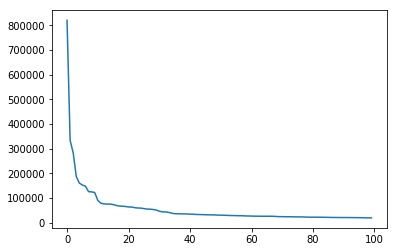

In [101]:
plt.plot(x, frequency)

In [102]:
import numpy as np

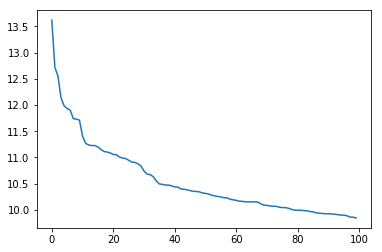

In [103]:
plt.plot(x,np.log(frequency))

In [104]:
def prob_1(word):
    return words_count[word] /len(TOKEN)

In [105]:
prob_1('我们')

0.0012253282693383172

In [13]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [14]:
TOKEN = [str(t) for t in TOKEN]

In [51]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-1]))]

In [52]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [54]:
word_count_2 = Counter(TOKEN_2_GRAM)

In [55]:
def prob_2(word1,word2):
    if word1+word2 in word_count_2:
        return word_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [56]:
def prob_2_review(word1,word2):
    if word1+word2 in word_count_2:
        return word_count_2[word1+word2] / words_count[word2]
    else:
        return 1/len(TOKEN_2_GRAM)

In [57]:
prob_2('我们','在')

3.131718702346836e-05

In [58]:
prob_2('在','吃饭')

3.1506224369686475e-07

In [59]:
prob_2('去','吃饭')

1.260248974787459e-07

In [60]:
prob_2_review('我们','在')

0.0021087915818058384

In [61]:
prob_2_review('在','吃饭')

0.017241379310344827

In [67]:
def get_probability(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2_review(word,next_)
        sentence_pro *= probability
    #最后需要乘最后一个单词的概率
    pro_last = words_count[words[-1]]/len(TOKEN)
    sentence_pro *= pro_last
    return sentence_pro

In [68]:
get_probability('小明今天抽奖抽到一台苹果手机')

2.5665041582455716e-42

In [70]:
get_probability('小明今天抽奖抽到一架波音飞机')

7.635778914193122e-37

In [71]:
get_probability('洋葱奶昔来一杯')

2.501952406657683e-22

In [72]:
get_probability('养乐多绿来一杯')

2.2017181178587606e-20

In [100]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probability(sen)))

sentence: 这个篮球听着这个女人 with Prb: 6.512340955667974e-27
sentence: 这个桌子看见一个篮球 with Prb: 5.033603071436843e-26
sentence: 一个篮球看见这个小小的蓝色的篮球 with Prb: 2.1320215799150615e-28
sentence: 这个桌子坐在这个桌子 with Prb: 1.550696535470833e-31
sentence: 这个桌子听着这个小小的小小的小小的小猫 with Prb: 6.982957780159903e-49
sentence: 这个小猫听着这个好看的桌子 with Prb: 5.671273815503312e-38
sentence: 一个女人看见这个好看的桌子 with Prb: 1.4357304037090779e-30
sentence: 这个篮球坐在这个女人 with Prb: 6.310094342137915e-26
sentence: 一个篮球坐在一个好看的篮球 with Prb: 1.9160413782130867e-32
sentence: 这个小猫听着这个小小的小猫 with Prb: 1.7586795027529167e-34


In [101]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))


明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 2.7989750141867755e-54
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.0680888654136734e-51
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 5.44706476062332e-34
---- 真是一只好看的小猫 with probility 8.644426410332083e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.8092073908107846e-20
---- 今晚火锅去吃我 with probility 4.6469356645393864e-24
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 2.501952406657683e-22
---- 养乐多绿来一杯 with probility 2.2017181178587606e-20
